# Image handling and manipulation in Python #

In this notebook we show how images can be read and treated as multidimensional arrays using Numpy and Matplotlib.

---
Start by loading `numpy` and `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Using built-in functions in `matplotlib`, images for most common file formats can be read using `imread`.

Note: The data type of the resulting numpy array can differ between file formats. PNG-files uses floats between 0.0 and 1.0 for the pixels while JPEG-files use short integers between 0 and 255.

In [2]:
# Image taken from google's imagen project URL: https://imagen.research.google/
image=plt.imread('../../Data/a-dragon-fruit-wearing-karate-belt.png')

The image data is now stored as a multidimensional matrix with dimensions `height x width x colorspace` where every element in the matrix represents the intensity of a single color of a single pixel. Here `colorspace` typically has size `3` for **R**ed-**G**reen-**B**lue (RGB) images. I.e. `image[:,:,0]` contains the intensity of the red color channel in the image, `image[:,:,1]` the green intensity and `image[:,:,2]` the blue.

Sometimes an additional channel `image[:,:,3]` is present and then this channel controls the opacity of the pixel.

---

To check the dimensions of the image we can use the ´shape` function.

In [3]:
print('Figure size:  height',image.shape[0],' px, width ',image.shape[1],
      'px, number of color channels:', image.shape[2])

Figure size:  height 1024  px, width  1024 px, number of color channels: 4


Without any manipulation, the read image can be displayed directly using `plt.imshow()` 

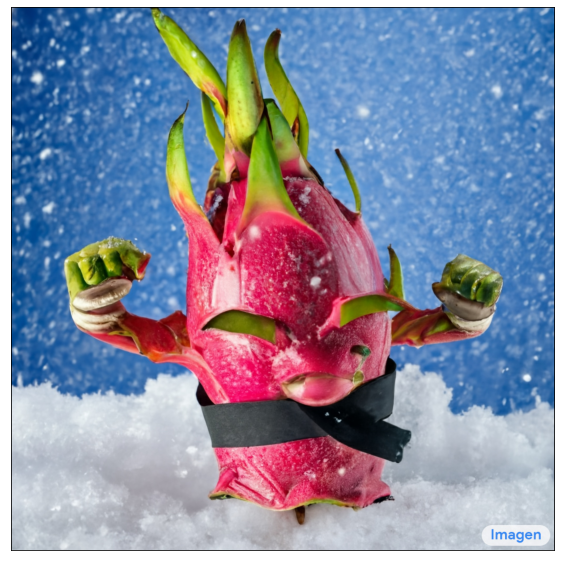

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

---
Back to the original image, we can inspect the intensities of the different color channels using `plt.imshow()` again. Here we use a gray-scale colormap for every channel showing maximum intensity as white and miminal intensity as black.

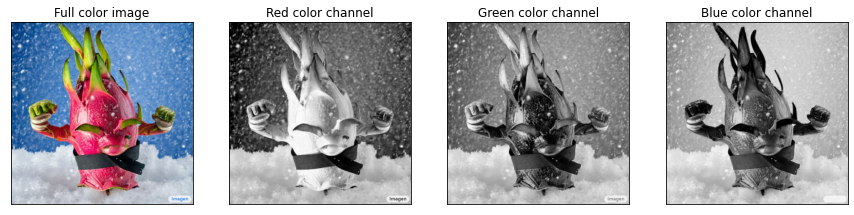

In [5]:
fig, (ax0,ax1,ax2,ax3)=plt.subplots(nrows=1, ncols=4, figsize=(15, 5),sharex=True,sharey=True)
ax0.imshow(image)
ax0.set_title('Full color image')
ax0.set_xticks([])
ax0.set_yticks([])
ax1.imshow(image[:,:,0],cmap=cm.gray)
ax1.set_title('Red color channel')
ax2.imshow(image[:,:,1],cmap=cm.gray)
ax2.set_title('Green color channel')
ax3.imshow(image[:,:,2],cmap=cm.gray)
ax3.set_title('Blue color channel')
plt.show()

From the intensity plots on the channels above we see that the red channel has a lot of intensity for the "body" while the green intensity is large for the "hair". The black belt has a low intensity for all channels and the white snow has a high intensity for all color channels. 

---

## Image manipulation ##
The image data can easily be manipulate by simple matrix operations, including algorithmic expressions, slicing and scaling.

As a first example, let's shift the red and blue color channels in the original figure

In [6]:
image_shuffle=np.copy(image)
image_shuffle[:,:,0]=image[:,:,2]
image_shuffle[:,:,2]=image[:,:,0]

The result is shown below.

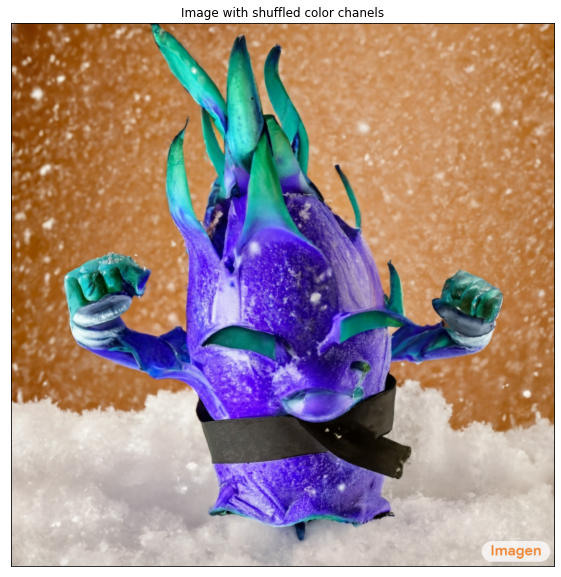

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(image_shuffle)
plt.xticks([])
plt.yticks([])
plt.title("Image with shuffled color chanels")
plt.show()

---
Certain elements, or wide ranges of pixels, can be manipulated as well. As an example, let's remove all the intensity from the red channel in the middle of the figure.

In [8]:
image_gap=np.copy(image)
image_gap[450:700,350:680,0]=0.0

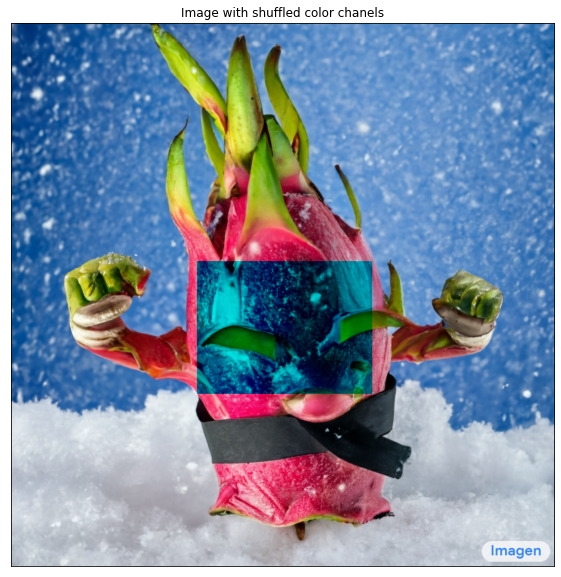

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image_gap)
plt.xticks([])
plt.yticks([])
plt.title("Image with shuffled color chanels")
plt.show()

As a slightly more advance example, lets access a region of the image using a `meshgrid` and manipulate the image. Here we make a 2d-function $f(x,y)=\sqrt{(x-x_0)^2+(y-y_0)^2}$ which can be used to define a circular area by selecting all pixels within a certain distance to $(x_0,y_0)$.

In [10]:
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
dist_mat=np.sqrt((Y-200)**2+(X-800)**2)
filter_mat=dist_mat<100

Now the color channels in the circular area can be manipulated as below.

In [11]:
image_sun=np.copy(image)
image_sun[filter_mat,0]=1.0#sun_map[filter_mat]
image_sun[filter_mat,1]=1.0#sun_map[filter_mat]
image_sun[filter_mat,2]=0.0

The resulting image can be seen below.

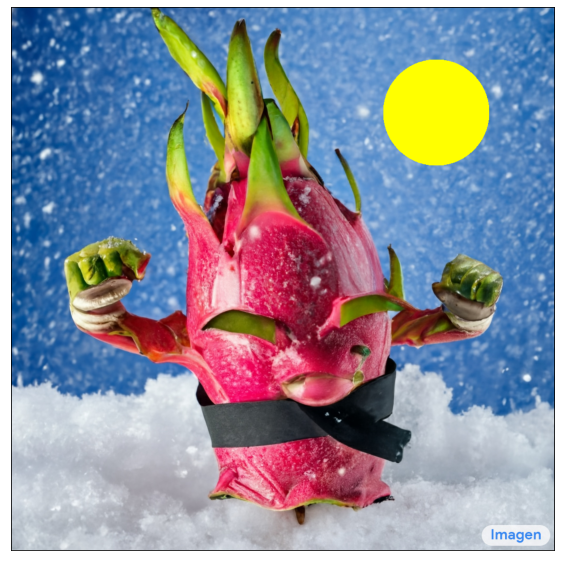

In [15]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(image_sun)
plt.show()

Manipulated figures can be saved using `plt.imsave(filename,array)`. Remember to ensure that the output array has the same data type as expected by the file format (`float32` for .png and `uint8` for .jpeg).


In [13]:
plt.imsave('sunny.png',image_sun)

---
## Note on imshow ##
`plt.imshow()` can actually be used to display any arbitrary matrix, but if the matrix has a dimension less than 3, then the colors of the plotted matrix is given by the colormap assigned to `matplotlib`. This is shown below where a small random 2d-matrix is created and plotted using different colormaps.

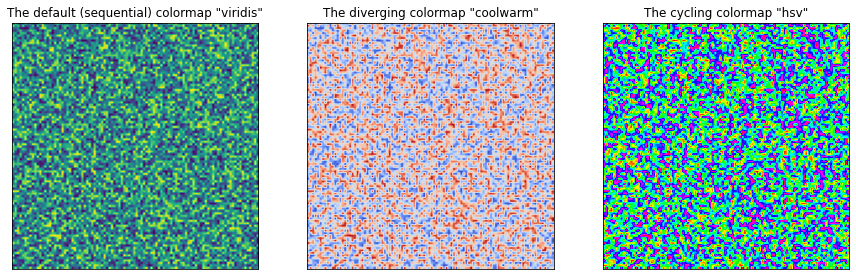

In [14]:
rand_image=np.random.rand(100,100)
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1, ncols=3, figsize=(15, 5),sharex=True,sharey=True)
ax1.imshow(rand_image)
ax1.set_title('The default (sequential) colormap "viridis"')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_title('The diverging colormap "coolwarm"')
ax2.imshow(rand_image,cmap=cm.coolwarm)
ax3.set_title('The cycling colormap "hsv"')
ax3.imshow(rand_image,cmap=cm.hsv)
plt.show()